# Homework 1
This Homework deals with Getting Data into Python, Cleaning it up and visualizing in such a way that it tells a story and helps the user see through the process of cleaning and showing results.



## Part 1 - SQL Dataset
This Data comes from (link), and has a robust amount of data on European Football (AKA soccer). The purpose of this Dataset is to help the user view the realtinship within players and teams to find the "secret sauce" and the ideal balance between the different variables within teams and players.

In [1]:
import pandas as pd
import numpy as np
#Imports SQL Database Commands
import sqlite3 as sql
from matplotlib import pyplot as plt

In [33]:
#Import Soccer Data and Interpret SQL commands
db = sql.connect('/Users/J.Alvarez/Downloads/soccer_database.sqlite')
cur = db.cursor()

In [34]:
#importing Data using SQL commands
cur.execute("SELECT * FROM team_attributes LIMIT 1000;")
print(cur.fetchall())

[(2, 434, 9930, '2014-09-19 00:00:00', 52, 'Balanced', 48, 'Normal', 56, 'Mixed', 'Organised', 54, 'Normal', 63, 'Normal', 64, 'Normal', 'Organised', 47, 'Medium', 44, 'Press', 54, 'Normal', 'Cover'), (3, 434, 9930, '2015-09-10 00:00:00', 47, 'Balanced', 41, 'Normal', 54, 'Mixed', 'Organised', 54, 'Normal', 63, 'Normal', 64, 'Normal', 'Organised', 47, 'Medium', 44, 'Press', 54, 'Normal', 'Cover'), (4, 77, 8485, '2010-02-22 00:00:00', 70, 'Fast', None, 'Little', 70, 'Long', 'Organised', 70, 'Risky', 70, 'Lots', 70, 'Lots', 'Organised', 60, 'Medium', 70, 'Double', 70, 'Wide', 'Cover'), (5, 77, 8485, '2011-02-22 00:00:00', 47, 'Balanced', None, 'Little', 52, 'Mixed', 'Organised', 53, 'Normal', 48, 'Normal', 52, 'Normal', 'Organised', 47, 'Medium', 47, 'Press', 52, 'Normal', 'Cover'), (6, 77, 8485, '2012-02-22 00:00:00', 58, 'Balanced', None, 'Little', 62, 'Mixed', 'Organised', 45, 'Normal', 70, 'Lots', 55, 'Normal', 'Organised', 40, 'Medium', 40, 'Press', 60, 'Normal', 'Cover'), (7, 77, 8

In [41]:
#Cleaning up the data using SQL commands
cur.execute('DELETE FROM team_attributes WHERE defenceTeamWidth < 50')

In [35]:
#printing the data
cur.execute("SELECT * FROM team_attributes LIMIT 1000;")
print(cur.fetchall())

[(2, 434, 9930, '2014-09-19 00:00:00', 52, 'Balanced', 48, 'Normal', 56, 'Mixed', 'Organised', 54, 'Normal', 63, 'Normal', 64, 'Normal', 'Organised', 47, 'Medium', 44, 'Press', 54, 'Normal', 'Cover'), (3, 434, 9930, '2015-09-10 00:00:00', 47, 'Balanced', 41, 'Normal', 54, 'Mixed', 'Organised', 54, 'Normal', 63, 'Normal', 64, 'Normal', 'Organised', 47, 'Medium', 44, 'Press', 54, 'Normal', 'Cover'), (4, 77, 8485, '2010-02-22 00:00:00', 70, 'Fast', None, 'Little', 70, 'Long', 'Organised', 70, 'Risky', 70, 'Lots', 70, 'Lots', 'Organised', 60, 'Medium', 70, 'Double', 70, 'Wide', 'Cover'), (5, 77, 8485, '2011-02-22 00:00:00', 47, 'Balanced', None, 'Little', 52, 'Mixed', 'Organised', 53, 'Normal', 48, 'Normal', 52, 'Normal', 'Organised', 47, 'Medium', 47, 'Press', 52, 'Normal', 'Cover'), (6, 77, 8485, '2012-02-22 00:00:00', 58, 'Balanced', None, 'Little', 62, 'Mixed', 'Organised', 45, 'Normal', 70, 'Lots', 55, 'Normal', 'Organised', 40, 'Medium', 40, 'Press', 60, 'Normal', 'Cover'), (7, 77, 8

### Hey!

In [42]:
#Commit and save changes to the DB
db.commit()
db.close()

In [43]:
db = sql.connect('/Users/J.Alvarez/Downloads/soccer_database.sqlite')
cur = db.cursor()

In [44]:
df = pd.read_sql_query("SELECT * from player LIMIT 1000", db)

In [45]:
df

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
5,6,27316,Aaron Hunt,158138,1986-09-04 00:00:00,182.88,161
6,7,564793,Aaron Kuhl,221280,1996-01-30 00:00:00,172.72,146
7,8,30895,Aaron Lennon,152747,1987-04-16 00:00:00,165.10,139
8,9,528212,Aaron Lennox,206592,1993-02-19 00:00:00,190.50,181
9,10,101042,Aaron Meijers,188621,1987-10-28 00:00:00,175.26,170


In [169]:
df.plot(kind = "scatter", x = "height", y = "weight")

KeyError: 'height'

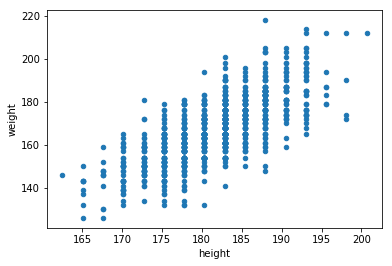

In [47]:
plt.show()

In [48]:
df.describe()

,id,player_api_id,player_fifa_api_id,height,weight
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,501.623000,169590.837000,169046.773000,181.447440,167.174000
std,289.673229,169041.598176,57013.603003,6.169536,14.605446
min,1.000000,2790.000000,6.000000,162.560000,126.000000
25%,250.750000,38211.250000,155922.000000,177.800000,157.000000
50%,502.500000,110124.500000,188145.500000,182.880000,165.000000
75%,752.250000,244985.750000,204833.750000,185.420000,176.000000
max,1002.000000,750584.000000,234141.000000,200.660000,218.000000


In [49]:
l = df.columns

In [50]:
print(l)

Index(['id', 'player_api_id', 'player_name', 'player_fifa_api_id', 'birthday',
       'height', 'weight'],
      dtype='object')


In [52]:
#cur.execute("SELECT player.player_name, player_attributes.overall_rating, player_attributes.")

In [53]:
player_a = pd.read_sql_query("SELECT * from player_attributes LIMIT 1000", db)

In [54]:
player_a

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,7,189615,155782,2016-04-07 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,8,189615,155782,2016-01-07 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
8,9,189615,155782,2015-12-24 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
9,10,189615,155782,2015-12-17 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


In [55]:
player_a.plot(kind = "scatter", x = "overall_rating", y = "short_passing")

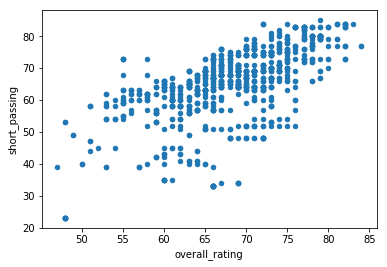

In [56]:
plt.show()

In [57]:
player_a.plot(kind = "scatter", x = "overall_rating", y = "finishing")

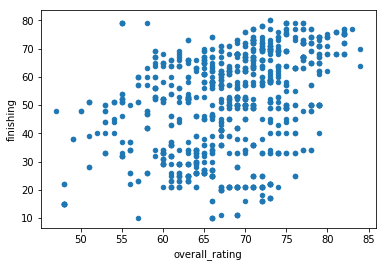

In [58]:
plt.show()

## Part 2 - API
This is 

https://www.youtube.com/watch?v=2BrpKpWwT2A

In [157]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import pandas as pd
import pandas_datareader.data as web
import numpy as np

In [79]:
style.use('ggplot')

start = dt.datetime(2000,1,1)
end = dt.datetime(2017,12,31)

df = web.DataReader('TSLA', 'yahoo', start, end)
df.to_csv('tsla.csv')

In [86]:
df = pd.read_csv('tsla.csv', parse_dates = True, index_col=0 )

In [87]:
print(df.head())

                 Open   High        Low      Close  Adj Close    Volume
Date                                                                   
2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900


In [88]:
df.plot()

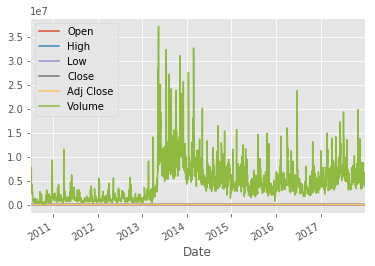

In [90]:
plt.show()

In [98]:
df.plot(kind = "line", x = "Open", y = "Close")

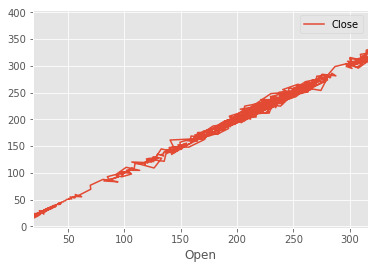

In [99]:
plt.show()

In [100]:
df['Adj Close'].plot()

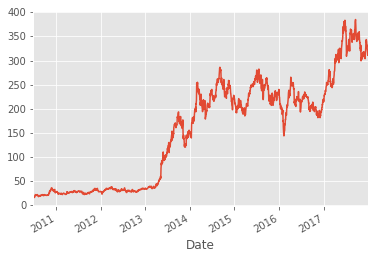

In [101]:
plt.show()

SHOWING THE MOVING AVERAGE1! bal bla bla bla bla


In [104]:
df['100ma'] = df['Adj Close'].rolling(window=100).mean()

In [106]:
print(df.tail())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-12-22  329.510010  330.920013  324.820007  325.200012  325.200012   
2017-12-26  323.829987  323.940002  316.579987  317.290009  317.290009   
2017-12-27  316.000000  317.679993  310.750000  311.640015  311.640015   
2017-12-28  311.750000  315.820007  309.540009  315.359985  315.359985   
2017-12-29  316.179993  316.410004  310.000000  311.350006  311.350006   

             Volume     100ma  
Date                           
2017-12-22  4215800  338.8005  
2017-12-26  4378400  338.5025  
2017-12-27  4712100  338.0498  
2017-12-28  4316300  337.6517  
2017-12-29  3777200  337.1130  


In [107]:
df.dropna(inplace=True)

In [108]:
print(df.head())

                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2010-11-17  30.200001  30.750000  28.610001  29.490000  29.490000   750000   
2010-11-18  30.670000  30.740000  28.920000  29.889999  29.889999   956100   
2010-11-19  30.160000  31.370001  29.700001  30.990000  30.990000  1150500   
2010-11-22  31.570000  33.450001  31.500000  33.400002  33.400002  1529700   
2010-11-23  33.290001  35.680000  32.189999  34.570000  34.570000  1577800   

              100ma  
Date                 
2010-11-17  20.9879  
2010-11-18  21.0479  
2010-11-19  21.1195  
2010-11-22  21.2339  
2010-11-23  21.3876  


In [ ]:
##plotting with matplotlib in a 6X2 table

In [142]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex=ax1)

In [162]:
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

<Container object of 1792 artists>

In [154]:
plt.show()

Stock Splits!!

In [165]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

In [166]:
print(df_ohlc.head())

                 open       high        low      close
Date                                                  
2010-11-17  29.490000  35.470001  29.490000  35.320000
2010-11-27  34.330002  35.330002  30.309999  30.309999
2010-12-07  31.559999  32.369999  28.530001  30.809999
2010-12-17  31.360001  32.630001  30.090000  30.090000
2010-12-27  25.549999  27.730000  25.549999  26.830000


## Part 3 - CSV
